<a href="https://colab.research.google.com/github/rafa-cc/Proyecto-Final-R/blob/main/Proyecto_Final_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Análisis de Productos de Amazon__
__📝 Descripción:__

> En este proyecto se usan datos sobre productos de comestibles de Amazon. Se cuenta con columnas como cifras de ventas, ingresos, dimensiones del producto, calificaciones y otras métricas esenciales.

__🎯 Objetivos:__
> - Clasificar los productos en categorías de tamaño basado en sus dimensiones.
- Proponer dimensiones para el empaquetado más óptimo en cada categoría.
- Probar si la calificación promedio de los clientes afecta las ventas.
- Examinar cómo se relaciona el precio con otras variables.
- Analizar la estacionalidad de las ventas.
- Clasificar los productos en categorías de alto, medio o bajo rendimiento basado en sus características.


El trabajo está divido en las siguientes secciones:

◉ _Librerías_  ◉ _Importación_  ◉ _Análisis Exploratorio (EDA)_  ◉ _Ingeniería de Variables_  ◉ _Análisis de Empaquetado_

## __Librerías__

In [ ]:
install.packages("e1071")
library(dplyr)
library(ggplot2)
library(e1071)
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## __Importación__

💡 El data set se encuentra [aquí](https://github.com/rafa-cc/Proyecto-Final-R/blob/main/dataset.csv)

In [ ]:
# El dataset se encuentra en el repositorio del proyecto
# Parece que el link se actualiza, volver a copiarlo si es necesario
df_raw <- read.csv("https://raw.githubusercontent.com/rafa-cc/Proyecto-Final-R/main/dataset.csv")

## __Análisis Exploratorio__

In [ ]:
head(df_raw)

,Product.Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA.Fees,Active.Sellers..,Ratings,Review.Count,Images,Review.velocity,Buy.Box,Category,Size.Tier,Delivery,Dimensions,Weight,Creation.Date
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,"Lindt Lindor Milk Chocolate Truffles Box - The Ideal Gift - Chocolate Balls with a Smooth Melting Filling, 200 g",B00NW479QO,Lindt,3.50,13466,47131,3,2.62,30,5,44069,12,868,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014
2,"Andrex Toilet Roll - Gentle Clean Toilet Paper, 45 Toilet Rolls",B004OCO20E,Andrex,18.28,13338,243819,2,8.38,30,5,40397,5,830,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011
3,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194,111828,4,3.93,22,5,3827,6,235,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010
4,"Tassimo Kenco Americano Grande Coffee Pods (Pack of 5, Total 80 Coffee Capsules)",B016DEGFWI,Tassimo,14.87,13492,200626,2,5.19,11,5,28800,5,466,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010
5,"Tassimo Costa Gingerbread Latte Coffee Pods (Pack of 5, Total 40 Coffee Capsules)",B07JVF2FCV,Tassimo,45.00,13377,601965,6,11.03,1,5,27494,9,223,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018
6,"Regina XXL Kitchen Roll, 8 Rolls, 600 Extra Large Sheets",B07T2SCHM7,Regina,8.00,11983,95864,5,6.16,21,5,11120,6,701,,Grocery,Large Oversize,MFN,10.6x34.6x5.1,5.34,5/1/2020


In [ ]:
names(df_raw)

[1] "Product.Details"  "ASIN"             "Brand"            "Price"           
 [5] "Sales"            "Revenue"          "BSR"              "FBA.Fees"        
 [9] "Active.Sellers.." "Ratings"          "Review.Count"     "Images"          
[13] "Review.velocity"  "Buy.Box"          "Category"         "Size.Tier"       
[17] "Delivery"         "Dimensions"       "Weight"           "Creation.Date"

In [ ]:
unique(df_raw$Size.Tier)

[1] "Small Oversize"    "Large Oversize"    "Standard Parcel"  
[4] ""                  "Large Envelope"    "Small Envelope"   
[7] "Standard Envelope" "Large Letter"

In [ ]:
# Descartar las columnas que no son de interés y dividir la columna 'Dimensions' en 'Length', 'Width' y 'Height'

df_temp <- select(df_raw,-Brand, -ASIN, -Review.velocity,-Size.Tier, -Images, -Buy.Box, -Delivery, -Weight, -FBA.Fees) %>%
      tidyr::separate(Dimensions, into = c("Length", "Width", "Height"), sep = "x", convert = TRUE)
names(df)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1516 rows [51, 62, 66,
99, 114, 131, 147, 191, 203, 209, 212, 213, 218, 226, 227, 229, 231, 232, 234,
235, ...].”


NULL

In [ ]:
# Contar los datos nulos en cada columna
sapply(df_temp, function(x) sum(is.na(x)))

Product.Details            Price            Sales          Revenue 
               0             1264             1802             1511 
             BSR Active.Sellers..          Ratings     Review.Count 
             453               51              828              828 
        Category           Length            Width           Height 
               0             1516             1516             1516 
   Creation.Date 
               0

In [ ]:
# Nuevo dataframe que solo incluye las filas sin valores nulos en las columnas 'Price' y 'Sales'
df_sin_nulos <- df_temp[complete.cases(df_temp$Price, df_temp$Sales), ]

# Aún hay datos nulos pero pueden descartarse en otro momento específico
sapply(df_sin_nulos, function(x) sum(is.na(x)))

Product.Details            Price            Sales          Revenue 
               0                0                0                0 
             BSR Active.Sellers..          Ratings     Review.Count 
               0               36              238              238 
        Category           Length            Width           Height 
               0              667              667              667 
   Creation.Date 
               0

In [ ]:
# Casting de 'Creation.Date' y factor de 'Ratings'
df_sin_nulos <- df_sin_nulos %>%
  mutate(Creation.Date = as.Date(Creation.Date, format = '%d/%m/%Y'), Ratings = factor(Ratings, ordered = TRUE))
summary(df_sin_nulos)

 Product.Details        Price            Sales            Revenue        
 Length:4242        Min.   :  0.50   Min.   :    0.0   Min.   :     0.0  
 Class :character   1st Qu.:  7.98   1st Qu.:   14.0   1st Qu.:   198.2  
 Mode  :character   Median : 12.99   Median :  114.5   Median :  1303.0  
                    Mean   : 15.09   Mean   : 1046.5   Mean   : 12900.9  
                    3rd Qu.: 19.99   3rd Qu.:  619.0   3rd Qu.:  6876.0  
                    Max.   :254.99   Max.   :23288.0   Max.   :601965.0  
                                                                         
      BSR          Active.Sellers..  Ratings      Review.Count    
 Min.   :      0   Min.   :  1.000   1   :  10   Min.   :    1.0  
 1st Qu.:   2896   1st Qu.:  1.000   2   :   8   1st Qu.:   23.0  
 Median :  11652   Median :  2.000   3   :  67   Median :  168.5  
 Mean   :  38034   Mean   :  4.842   4   :1175   Mean   : 1157.0  
 3rd Qu.:  58930   3rd Qu.:  5.000   5   :2744   3rd Qu.:  680.2  
 Max. 

## __Ingeniería de Variables__

In [ ]:
# Valores únicos de 'Category'
print(unique(df_sin_nulos$Category))

 [1] "Food Cupboard"                    "Grocery"                         
 [3] "Beer, Wine & Spirits"             "Fresh & Chilled"                 
 [5] "Drinks"                           "Home & Kitchen"                  
 [7] "Business, Industry & Science"     "Automotive"                      
 [9] "Hampers & Gourmet Gifts"          "Health & Personal Care"          
[11] "Outdoor Recreation"               "Cooking & Dining"                
[13] "Diet & Nutrition"                 "Home Accessories"                
[15] "Vitamins, Minerals & Supplements" "Frozen"                          
[17] "Bakery"                           "Garden & Outdoors"               
[19] "Toys & Games"                     "Beauty"                          


Estas categorias podrías simplificarse tentativamente en la siguiente forma:

> | Category | Subcategories |
|---|---|
| **Alimentos y despensa** |   ◉ Food Cupboard  ◉ Grocery  ◉ Fresh & Chilled   ◉ Cooking & Dining   ◉ Frozen   ◉ Bakery |
| **Bebidas** |   ◉ Beer, Wine & Spirits   ◉ Drinks |
| **Hogar y cocina** |   ◉ Home & Kitchen   ◉ Home Accessories   ◉ Garden & Outdoors |
| **Cuidado personal y salud** |   ◉ Health & Personal Care   ◉ Beauty   ◉ Vitamins, Minerals & Supplements   ◉ Diet & Nutrition |
| **Regalos y ocio** |   ◉ Hampers & Gourmet Gifts   ◉ Outdoor Recreation   ◉ Toys & Games |
| **Industria y ciencia** |   ◉ Business, Industry & Science   ◉ Automotive |






In [ ]:
# Definir las categorías de agrupación
categorias <- list(
  Food_Grocery = c("Food Cupboard", "Grocery", "Fresh & Chilled", "Cooking & Dining", "Frozen", "Bakery"),
  Drinks = c("Beer, Wine & Spirits", "Drinks"),
  Home_Kitchen = c("Home & Kitchen", "Home Accessories", "Garden & Outdoors"),
  Health_Care = c("Health & Personal Care", "Beauty", "Vitamins, Minerals & Supplements", "Diet & Nutrition"),
  Gifts_Entertainment = c("Hampers & Gourmet Gifts", "Outdoor Recreation", "Toys & Games"),
  Industry_Science = c("Business, Industry & Science", "Automotive")
)

# Función para asignar la categoría madre
asignar_categoria <- function(cat) {
  for (nombre_categoria in names(categorias)) {
    if (cat %in% categorias[[nombre_categoria]]) {
      return(nombre_categoria)
    }
  }
}

# Crear la nueva columna y hacerla factor, desechar 'Category' pues ya no es necesaria
df_main <- df_sin_nulos %>%
  mutate(High.Category = sapply(Category, asignar_categoria)) %>%
  mutate(High.Category = factor(High.Category)) %>%
  select(-Category) %>%
  rename(Category = High.Category)

summary(df_main)

 Product.Details        Price            Sales            Revenue        
 Length:4242        Min.   :  0.50   Min.   :    0.0   Min.   :     0.0  
 Class :character   1st Qu.:  7.98   1st Qu.:   14.0   1st Qu.:   198.2  
 Mode  :character   Median : 12.99   Median :  114.5   Median :  1303.0  
                    Mean   : 15.09   Mean   : 1046.5   Mean   : 12900.9  
                    3rd Qu.: 19.99   3rd Qu.:  619.0   3rd Qu.:  6876.0  
                    Max.   :254.99   Max.   :23288.0   Max.   :601965.0  
                                                                         
      BSR          Active.Sellers..  Ratings      Review.Count    
 Min.   :      0   Min.   :  1.000   1   :  10   Min.   :    1.0  
 1st Qu.:   2896   1st Qu.:  1.000   2   :   8   1st Qu.:   23.0  
 Median :  11652   Median :  2.000   3   :  67   Median :  168.5  
 Mean   :  38034   Mean   :  4.842   4   :1175   Mean   : 1157.0  
 3rd Qu.:  58930   3rd Qu.:  5.000   5   :2744   3rd Qu.:  680.2  
 Max. 

## __Análisis de Empaquetado__

Se comienza ordenando cada fila de menor a mayor, no importa si se mezaclan las columnas pues las mediciones de Length, Width, Height son subjetivas dependiendo de la orientación a la hora de medir.

Conviene clasificar los empaques por la forma que tienen. Basado en el razonamiento, los posibles tipos de caja propuesto fueron los siguientes:

|Pizza|Cubo|Leche|Estaca|Tabla|Desconocido|
|---|---|---|---|---|---|
|2 dimensiones muy parecidas con <br> lo que se tiene una base aproxima-<br>damente  cuadrada y la 3er dimension <br> es más pequeña respecto a las otras|las 3 medidas son muy similares <br> entre si, generando una forma <br>cercana a la de un cubo| 3 dimensiones que están <br> aproximadamente equidistantes <br> entre sí|2 dimensiones muy parecidas con <br> lo que se tiene una base aproxima-<br>damente  cuadrada y la 3er dimension <br> es más grande respecto a las otras| 2 dimensiones diferentes, y <br> la tercera es más pequeña en <br> comparación con las otras dos| Cualquiera que no sea una <br> de las anteriores|

Para ver las referencias visuales estas formas consultar el [repositorio](https://github.com/rafa-cc/Proyecto-Final-R/tree/main/Imagenes)

In [ ]:
# Nuevo dataframe que solo incluye las filas sin valores nulos en las columnas de dimensiones
df_empaquetado <- df_main[complete.cases(df_main$Length), ]

# En cada fila ordenar las columnas de dimensiones de menor a mayor
df_temp <- df_empaquetado %>%
        select(Length, Width, Height) %>%
        apply(1, sort) %>%
        t() %>%
        as.data.frame() %>%
        setNames(c("Length", "Width", "Height"))

# Reasignar los valores ordenados y se ordenan las filas de menos a mayor basado en 'Length'
df_empaquetado <- df_empaquetado %>%
        select(Length, Width, Height) %>%
        mutate(Length = df_temp$Length, Width = df_temp$Width, Height = df_temp$Height) %>%
        arrange(Length) %>%
        slice(-1) # Eliminar el primer registro pues sus dimensiones son 0's
# Reiniciar los indices después de los reordenamientos
row.names(df_empaquetado) <- NULL

# Guardar el dataframe para su análisis con Python
write.csv(x=df_empaquetado, file="data.csv", col.names = TRUE, row.names = FALSE)

Warning message in write.csv(x = df_empaquetado, file = "data.csv", col.names = TRUE, :
“attempt to set 'col.names' ignored”


### __Análisis con Python__

Se decidió hacer una clasificación alternativa en Python a manera de comparación. Para consultar dicho análisis ir al siguiente [archivo](https://colab.research.google.com/drive/1pnK2Lhk898ryd-9OdGD4vEEa8AAO1Pp5?usp=sharing)

> Para la clasificación de los posibles tipos de caja se escogió un modelo de maquina de soporte vectorial en ambos análisis.



### __Análisis con R__

Los datos se normalizan respecto a la mediana pues al final lo que caracteriza a cada forma es la distancia de los valores extremos respecto a ese punto medio, por ello fue importane ordenar por filas de menor a mayor cuando se manipuló con `R`

In [ ]:
normal <- function(triada) {
  # Calcular la mediana de la triada
  med <- median(triada)
  # Normalizar cada número en la triada respecto a la mediana
  triada_normalizada <- round(triada / med, 2)

  return(triada_normalizada)
}

In [ ]:
# Crear un nuevo dataframe con una columna que contenga las dimensiones normalizadas
df_temp <- data.frame(t(apply(df_empaquetado, 1, normal))) %>%
            mutate(normal = I(mapply(c, Length, Width, Height, SIMPLIFY = FALSE))) %>%
            select(-Length, -Width, -Height)
# Unir la columna al dataframe de análisis
df_empaquetado <- cbind(df_empaquetado, df_temp)

head(df_empaquetado, n=2)

,Length,Width,Height,normal
,<dbl>,<dbl>,<dbl>,<I<list>>
1,0.1,5.1,6.2,"0.02, 1,...."
2,0.2,4.4,6.8,"0.05, 1,...."


El modelo se entrena con los valores posibles que pueden tener las formas de los objetos. _Por ejemplo un cubo puede tener su mínimo entre $\sf[0.66,1]$ y su máximo entre $\sf[1,1.33]$_. Entonces se colocan algunas combinaciones para que el modelo considere ese rango de opciones.

In [ ]:
# Ejemplo de datos etiquetados para entrenar el modelo
data <- data.frame(
  triada = I(list(
  c(0.64, 1.0),
  c(1.0, 1.0),
  c(1.0, 1.33),
  c(0.64, 1.33),
  c(0.88, 1.0),
  c(1.0, 1.0),
  c(1.0, 1.15),
  c(0.88, 1.15),
  c(0.88, 1.33),
  c(0.64, 1.11),
  c(0.7, 1.2),

  c(0.11, 1.0),
  c(0.33, 1.0),
  c(0.4, 1.0),
  c(0.11, 1.33),
  c(0.33, 1.33),
  c(0.4, 1.33),
  c(0.4, 1.11),
  c(0.33, 1.11),
  c(0.11, 1.11),
  c(0.45, 1.0),
  c(0.45, 1.11),

  c(1.0, 2.0),
  c(1.0, 1.66),
  c(1.0, 1.4),
  c(0.88, 2.0),
  c(0.88, 1.66),
  c(0.88, 1.4),
  c(0.66, 2.0),
  c(0.66, 1.66),
  c(0.66, 1.4),

  c(0.5, 2.11),
  c(0.5, 2.66),
  c(0.5, 2.4),
  c(1.0, 2.11),
  c(1.0, 2.66),
  c(1.0, 2.4),
  c(1.0, 2.88),
  c(1.0, 3),
  c(1.0, 4),
  c(0.88, 2.0),
  c(0.88, 2.66),
  c(0.88, 2.4),
  c(0.66, 2.0),
  c(0.66, 2.66),
  c(0.66, 2.4),

  c(0.11, 1.4),
  c(0.11, 1.6),
  c(0.11, 1.8),
  c(0.11, 2.0),
  c(0.11, 2.4),
  c(0.11, 2.6),
  c(0.33, 1.4),
  c(0.33, 1.6),
  c(0.33, 1.8),
  c(0.33, 2.0),
  c(0.33, 2.4),
  c(0.33, 2.6),
  c(0.4, 1.4),
  c(0.4, 1.6),
  c(0.4, 1.8),
  c(0.4, 2.0),
  c(0.4, 2.4),

  c(0.6, 1.2),
  c(0.6, 1.33),
  c(0.6, 1.4),
  c(0.6, 1.6),
  c(0.6, 2.0),
  c(0.55, 1.0),
  c(0.55, 1.2),
  c(0.55, 1.33),
  c(0.55, 1.4),
  c(0.55, 1.4),
  c(0.55, 1.6),
  c(0.55, 2.0))),
etiqueta = c('Cubo', 'Cubo', 'Cubo', 'Cubo','Cubo', 'Cubo','Cubo','Cubo','Cubo','Cubo','Cubo', #11
'Pizza','Pizza','Pizza','Pizza','Pizza','Pizza','Pizza','Pizza','Pizza','Pizza','Pizza', #11
'Leche','Leche','Leche','Leche','Leche','Leche','Leche','Leche','Leche', #9
'Estaca','Estaca','Estaca','Estaca','Estaca','Estaca','Estaca',
'Estaca','Estaca','Estaca','Estaca','Estaca','Estaca','Estaca','Estaca', #15
'Tabla','Tabla','Tabla','Tabla','Tabla','Tabla','Tabla','Tabla',
'Tabla','Tabla','Tabla','Tabla','Tabla','Tabla','Tabla','Tabla','Tabla', #17
'Desco','Desco','Desco','Desco','Desco','Desco','Desco','Desco','Desco','Desco','Desco','Desco') # Asegúrate de completar esta lista con todas las etiquetas
)

In [ ]:
set.seed(127)
# Separar triadas y etiquetas
X <- do.call(rbind, data$triada)
y <- data$etiqueta

# Generar índices aleatorios para el conjunto de entrenamiento (se usó la misma semilla en Python)
trainIndex <- sample(1:nrow(X), nrow(X) * 0.8)

# Dividir el conjunto de datos
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]

# Validar que tanto 'train' y 'test' tienen los mismos niveles de etiquetas
all_levels <- unique(c(y_train, y_test))
y_train <- factor(y_train, levels = all_levels)
y_test <- factor(y_test, levels = all_levels)

# Crear y entrenar el modelo
training_data <- data.frame(X_train, etiqueta = factor(y_train))
model <- svm(etiqueta ~ ., data = training_data)

# Evaluar el modelo
y_pred <- predict(model, X_test)

# Crear la matriz de confusión
conf_matrix <- table(Actual = y_test, Predicted = y_pred)

# Calcular la precisión
accuracy <- sum(diag(conf_matrix)) / length(y_test)
print(paste('Precisión del modelo:', accuracy))

[1] "Precisión del modelo: 0.866666666666667"


In [ ]:
# Crear una función para aplicar el modelo a cada triada
clasificar_triada <- function(triada) {
  # Convertir la lista en un vector numérico
  triada_vector <- unlist(triada)
  # Eliminar el segundo elemento pues siempre será 1
  triada_vector <- triada_vector[-2]
  # Convertir el vector en un dataframe con nombres de columnas que coincidan con los de los datos de entrenamiento
  triada_df <- data.frame(t(triada_vector))
  names(triada_df) <- names(X_train)
  etiqueta <- predict(model, triada_df)

  return(etiqueta)
}

# Aplicar la función a la columna 'normal' y crear una nueva columna 'etiqueta'
df_empaquetado$etiqueta <- sapply(df_empaquetado$normal, clasificar_triada)

In [ ]:
head(df_empaquetado)

,Length,Width,Height,normal,etiqueta
,<dbl>,<dbl>,<dbl>,<I<list>>,<fct>
1,0.1,5.1,6.2,"0.02, 1,....",Pizza
2,0.2,4.4,6.8,"0.05, 1,....",Tabla
3,0.3,0.3,0.7,"1, 1, 2.33",Estaca
4,0.3,0.3,0.7,"1, 1, 2.33",Estaca
5,0.3,2.9,4.3,"0.1, 1, 1.48",Tabla
6,0.3,2.9,4.3,"0.1, 1, 1.48",Tabla


In [ ]:
# Eliminar la columna 'normal' porque si no el csv no se genera. Crear la columna 'volumen'
df_empaquetado <- df_empaquetado %>% select(-normal) %>% mutate(volumen = round(Length * Width * Height,2))
# Guardar el dataframe para su análisis con Python
write.csv(x=df_empaquetado, file="data_emp_class_R.csv", col.names = TRUE, row.names = FALSE)

Warning message in write.csv(x = df_empaquetado, file = "data_emp_class_R.csv", :
“attempt to set 'col.names' ignored”


### __Regreso a R__

Una vez con los datos clasificados y tambien clusterizados por su distancia al origen es momento de proponer los tamaños ideales para los empaques en cada cluster.

In [ ]:
df_empaquetado_py <- read.csv("https://raw.githubusercontent.com/rafa-cc/Proyecto-Final-R/main/data_emp_class.csv")
f_empaquetado_py <- df_empaquetado_py %>%
          mutate(etiqueta = as.factor(etiqueta)) %>% # Hacer factor 'etiqueta'
          mutate(volumen = Length * Width * Height)
desperdicio <- c(1)
df_empaquetado <- cbind(df_empaquetado,desperdicio)

Para asegurar que una caja pueda contener a todas lob objetos de su categoria entonces debe tener al menos las dimensiones del objeto a contener, así se escoge el máximo de cada dimensión registrada dentro de tal categoria.

In [ ]:
categorias <- levels(unique(df_empaquetado$etiqueta))

# Crear dataframe que guarde las dimensiones ideales, se añaden datos prueba
df_cajas <- data.frame(Length = 1.2, Width = 5.5, Height = 5.5, volumen_caja = 5.5, Forma = 'a', cluster = 1)
df_final <- data.frame()
# Se crean 6 Dataframes temporales, cada uno correspondiente a la forma 'Pizza', 'leche' , etc.
for(i in 1:length(unique(df_empaquetado$etiqueta))) {
  temp_df <- filter(df_empaquetado,etiqueta == categorias[i])
  k <- 6
  # Crear el modelo KMeans y ajustarlo a los datos
  kmeans_result <- kmeans(temp_df[,c('Length', 'Width', 'Height')], k)

  # Agregar las etiquetas de los clusters al DataFrame
  temp_df$cluster <- kmeans_result$cluster


  # Por cada dataframe de forma calcular las dimensiones máximas de cada cluster
  for(j in 1:length(unique(temp_df$cluster))){
    df_temp <- temp_df %>%
      filter(cluster == j)
    maximos <- apply(df_temp[, c("Length", "Width", "Height")], 2, max)
    vol_caja <- round(prod(maximos),2)
    maximos <- c(maximos,vol_caja,categorias[i],j)
    df_cajas <- rbind(df_cajas, maximos)
  }
  df_rest <- merge(temp_df,df_cajas, by.x = c("etiqueta","cluster"), by.y = c("Forma","cluster"))

  df_final <- rbind(df_final,df_rest)
}

# Datos finales
df_cajas <- df_cajas %>%
  mutate(Length= as.numeric(Length), Width= as.numeric(Width), Height=as.numeric(Height), volumen_caja= as.numeric(volumen_caja), Forma = factor(Forma), cluster = as.numeric(cluster)) %>%
  slice(-1) %>%
  arrange(desc(Forma),desc(Length))

df_final


etiqueta,cluster,Length.x,Width.x,Height.x,volumen,desperdicio,Length.y,Width.y,Height.y,volumen_caja
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Desco,1,1.3,2.8,3.8,13.83,1,2.8,4.8,6.7,90.05
Desco,1,1.4,2.4,3.5,11.76,1,2.8,4.8,6.7,90.05
Desco,1,1.4,2.4,3.5,11.76,1,2.8,4.8,6.7,90.05
Desco,1,1.5,2.6,3.2,12.48,1,2.8,4.8,6.7,90.05
Desco,1,1.5,2.6,3.2,12.48,1,2.8,4.8,6.7,90.05
Desco,1,1.5,2.6,3.2,12.48,1,2.8,4.8,6.7,90.05
Desco,1,1.7,3.5,5.5,32.73,1,2.8,4.8,6.7,90.05
Desco,1,1.7,3.5,5.5,32.73,1,2.8,4.8,6.7,90.05
Desco,1,1.7,3.2,5.1,27.74,1,2.8,4.8,6.7,90.05


In [ ]:
df_final <- mutate(df_final, volumen_caja = as.numeric(volumen_caja))
df_final$desperdicio <- 100 / df_final$volumen_caja * df_final$volumen

In [ ]:
head(df_final)

,etiqueta,cluster,Length.x,Width.x,Height.x,volumen,desperdicio,Length.y,Width.y,Height.y,volumen_caja
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Desco,1,1.3,2.8,3.8,13.83,15.35813,2.8,4.8,6.7,90.05
2,Desco,1,1.4,2.4,3.5,11.76,13.05941,2.8,4.8,6.7,90.05
3,Desco,1,1.4,2.4,3.5,11.76,13.05941,2.8,4.8,6.7,90.05
4,Desco,1,1.5,2.6,3.2,12.48,13.85897,2.8,4.8,6.7,90.05
5,Desco,1,1.5,2.6,3.2,12.48,13.85897,2.8,4.8,6.7,90.05
6,Desco,1,1.5,2.6,3.2,12.48,13.85897,2.8,4.8,6.7,90.05


In [ ]:
vol_total <- sum(df_final$volumen.x)
vol_desperdicio <- sum(df_final$desperdicio)
vol_cajs <- sum(df_final$volumen.y)
vol_desperdicio*100/vol_cajs

[1] Inf

[1] 44.64025

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


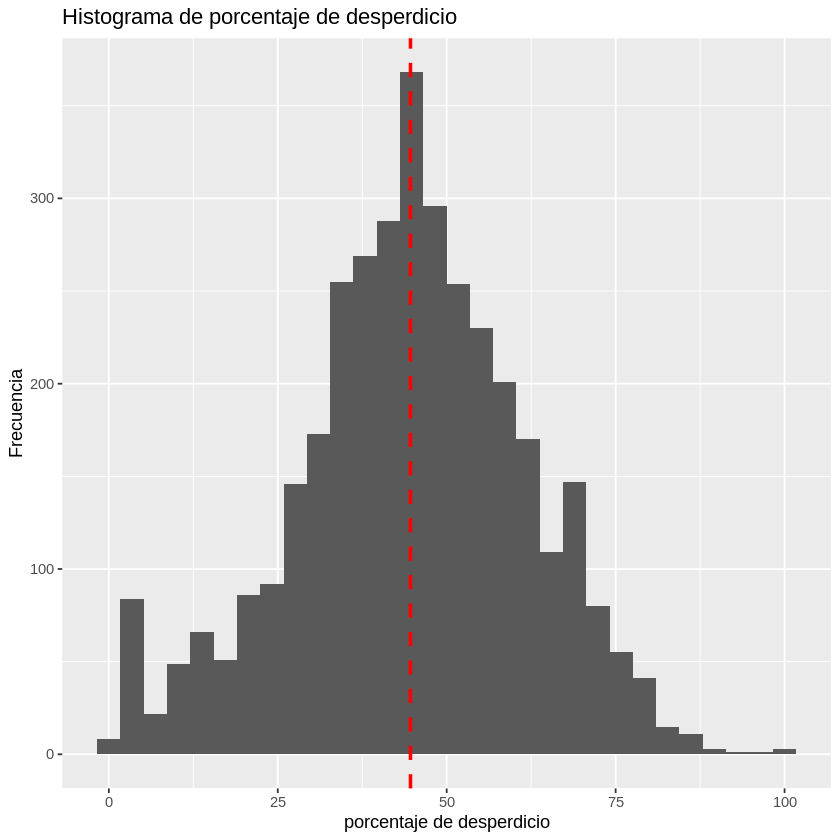

In [ ]:
(media <- mean(df_final$desperdicio))

ggplot(df_final, aes(x = desperdicio)) +
  geom_histogram() +
  labs(title = "Histograma de porcentaje de desperdicio",
       x = "porcentaje de desperdicio",
       y = "Frecuencia")+
  geom_vline(xintercept = media, color = "red", linetype = "dashed", linewidth = 1)